In [10]:
#return the mean of the values
def mean(values):
    return sum(values) / float(len(values))

In [11]:
#to calculate the variance 
def variance(values,mean):
    return sum([(x-mean)**2 for x  in values])

In [17]:
#calculating the mean and varience on overall data 

dataset1 = [[1,3], [2,4],[3,2],[4,4],[5,5]]
x = [row[0] for row  in dataset1]
y = [row[1] for row  in dataset1]
mean_x = mean(x)
mean_y = mean(y)
var_x = variance(x,mean_x)
var_y = variance(y,mean_y)
print("for x we have mean:{} and var:{}".format(round(mean_x,ndigits=3),round(var_x),ndigits=3))
print("for y we have mean:{} and var:{}".format(round(mean_y,ndigits=3),round(var_y),ndigits=3))

for x we have mean:3.0 and var:10
for y we have mean:3.6 and var:5


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [110]:
data = pd.read_csv('sales2.csv')
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,11/7/2011,185941302,12/8/2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12/9/2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,4/10/2010,161442649,5/12/2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45


In [111]:
X = data['Total Cost'].values
Y = data['Total Profit'].values

In [112]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [113]:
n = len(X)

In [114]:
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2

In [115]:
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)

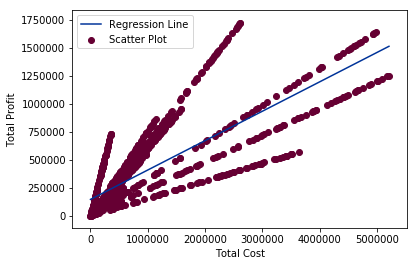

In [116]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x,max_x,1000)
y = b0 + (b1 * x)

plt.plot(x,y,color='#003399',label='Regression Line')

plt.scatter(X,Y,c='#660033',label='Scatter Plot')

plt.xlabel('Total Cost')
plt.ylabel('Total Profit')
plt.legend()
plt.show()

In [117]:
rmse = 0
for i in range(n):
    y_p = b0 + (b1 * X[i])
    rmse += (Y[i] - y_p) ** 2
rmse = np.sqrt(rmse/n)
print(rmse)

231573.92548824562


In [118]:
ss_res = 0
ss_reg = 0
for i in range(n):
    y_p = b0 + (b1 * X[i])
    ss_res += (Y[i] - y_p) ** 2
    ss_reg += (Y[i] - mean_y) ** 2
r2 = 1 - (ss_res/ss_reg)
print(r2)

0.6352749088511549


In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [120]:
X = X.reshape((n,1))
# reg = LinearRegression()
reg = LinearRegression().fit(X,Y)

In [121]:
y_p = b0 + (b1 * X)
rmse = np.sqrt(mean_squared_error(Y,y_p))
r2 = reg.score(X,Y)

In [122]:
print(rmse,'\n',r2)

231573.92548824556 
 0.6352749088511547
